<a href="https://colab.research.google.com/github/aayushbhurtel/MachineLearning/blob/main/week_5_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Which Public Health Factors have the Greatest Impact on Life Expectancy?
Life expectancy is the crucial metric for evaluating population health. It provides the average number of years that a group of people in a population is estimated to live. This factor is estimated based on various public health factors. The task of this project is to determine what are the various factors which can help in determining life expectancy. <br>

Data Source:
The raw data was extracted from Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status. The various features of the dataset include:
Features include:

* Country
* HIV\AIDS
* Measles
* Year
* Hepatitis B
* Body Mass Index (BMI)
* Life expectancy
* Polio
* Status
* Adult mortality
* Diphtheria
* Prevalence for malnutrition 5-9
* Infant mortality
* Gross Domestic Product (GDP)
* Education
* Alcohol consumption
* Population
* Total expenditure on health
* Expenditure on health (%)
* Prevalence for malnutrition 1-19
* Status


Task 1:
Read the raw data from the source file in Python.
First lets import all the necessy libraries and we keep on adding these libraries in later stages according to necessary.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/aayushbhurtel/MachineLearning/refs/heads/main/Life_Expectancy_Data.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

# Perform feature enginnering:

1. Population size: Create a population range that includes three categories:
  1. Small -  a population between 1,000 and 29,999,
  2. Medium -  a population between 30,000 and 99,999, and
  3. Large -  a population of 100,000 or more.

First, lets check if population has NaN values and if it does then fill it with median. Otherwise use bins to categorize each category according to rules.
  

In [5]:
df['Population'].isna().sum()

np.int64(652)

Looks like there are 652 missing values in popluation. Lets replace them with median values. Use bins to cateogorize popluation according to rules.

In [6]:
df['Population'].fillna(df['Population'].median(), inplace=True)
df['Population range'] = pd.cut(df['Population'], bins=[0, 29999, 99999, np.inf], labels=['Small', 'Medium', 'Large'])
df['Population range']

<ipython-input-6-29e73624a443>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Population'].fillna(df['Population'].median(), inplace=True)


,Population range
0,Large
1,Large
2,Large
3,Large
4,Large
...,...
2933,Large
2934,Large
2935,Large
2936,Large


Lifestyle – Create a lifestyle feature that combines alcohol consumption and BMI.

I am going to create a composite score by combining alcohol and BMI index by multiplying both features.

In [7]:
df['Lifestyle'] = df['Alcohol'] * df[' BMI ']

df['Lifestyle']

,Lifestyle
0,0.191
1,0.186
2,0.181
3,0.176
4,0.172
...,...
2933,118.156
2934,108.402
2935,116.509
2936,44.548


Economy – Create an economy feature that combines population and GDP. <br>
The most straightforward way to combine these is by calculating the GDP per capita, which measures the average income per person:

In [8]:
df['Economy'] = df['GDP'] * df['Population']
df['Economy']

,Economy
0,1.971086e+10
1,2.007083e+08
2,2.004633e+10
3,2.476810e+09
4,1.892519e+08
...,...
2933,5.805675e+09
2934,5.727592e+09
2935,7.198650e+06
2936,6.783921e+09


Death Ratio – Determine the death ratio between adult and infant mortality. <br>
death ratio is a metric indicating the relationship between adult and infant mortality. Adding replace method to replace NaN values with 0 if the infant death is zero.

In [9]:
df['Death ratio'] = df['Adult Mortality'] / df['infant deaths'].replace(0, np.nan)
df['Death ratio']

,Death ratio
0,4.241935
1,4.234375
2,4.060606
3,3.942029
4,3.873239
...,...
2933,26.777778
2934,27.500000
2935,2.920000
2936,27.440000


# Task 2:
Perform data cleaning by either removing any fragmented observations or by imputing missing values as necessary. Generate scatter plots between each predictor with the target variable to check the linear relationship and apply data transformations like log transform, if necessary.<br>
First, we will use `isnull()` function to find the missing data in the dataset.

In [10]:
df.isnull()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Population range,Lifestyle,Economy,Death ratio
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2934,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2935,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2936,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Looks like there is much of a missing values in our dataset. Lets calculate the sum of null values in our dataset to figure out exactly how many missing values are there. I am going to use isna().sum()

In [11]:
df.isna().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,10
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0


Lets impute numerical values using a median.

In [12]:
df.fillna(df.median(numeric_only=True), inplace=True)

In [13]:
df.isna().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,0
Adult Mortality,0
infant deaths,0
Alcohol,0
percentage expenditure,0
Hepatitis B,0
Measles,0


Now there are no NaN values in our dataset. Let move on to our next analysis.

Generate scatter plots between each predictor with the target variable to check the linear relationship and apply data transformations like log transform, if necessary.

In Machine Learning, Variables are categorized into two types:
Predictor: Input features which are used to predit the outcome

Target: Dependent variable which we are trying to predict.

In our case, Life expectancy is a target variable and rest all others are predictor variable.
Lets generate Scattor Plot between each predictor and target variable to see the linear relationship.



In [33]:
print(df.columns)

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'Population range',
       'Lifestyle', 'Economy', 'Death ratio', 'Life_expectancy_log'],
      dtype='object')


Lets start with *Life Expenctancy* vs *Adult Mortality*

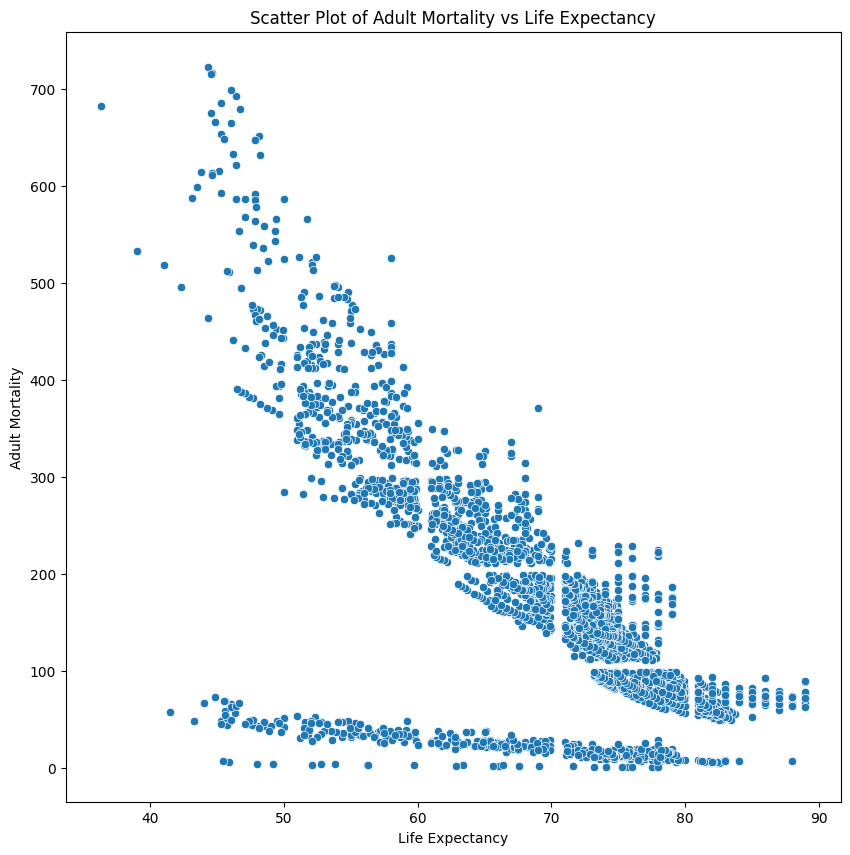

In [35]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x=df['Life expectancy '], y=df['Adult Mortality'])
plt.xlabel('Life Expectancy')
plt.ylabel('Adult Mortality')
plt.title('Scatter Plot of Adult Mortality vs Life Expectancy')
plt.show()

Let's create a function that creates all the scatter-plot for our feature and predictor.

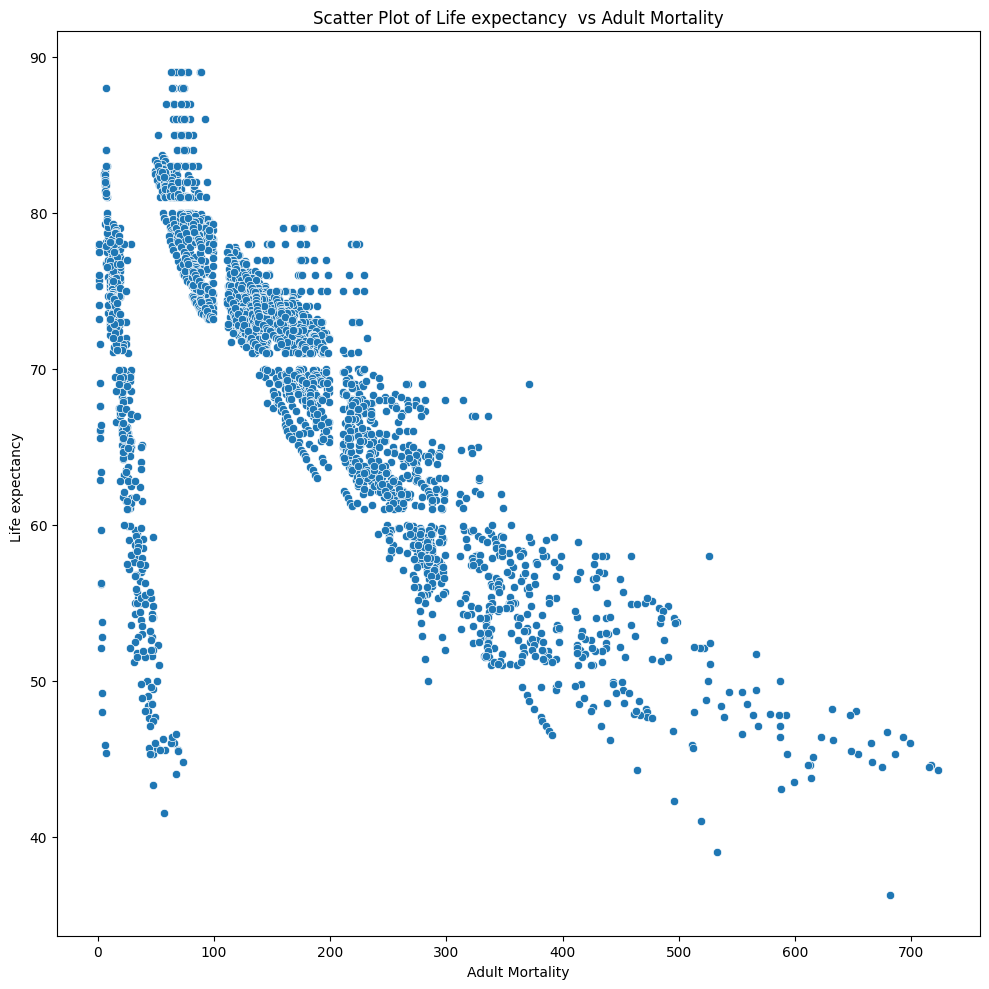

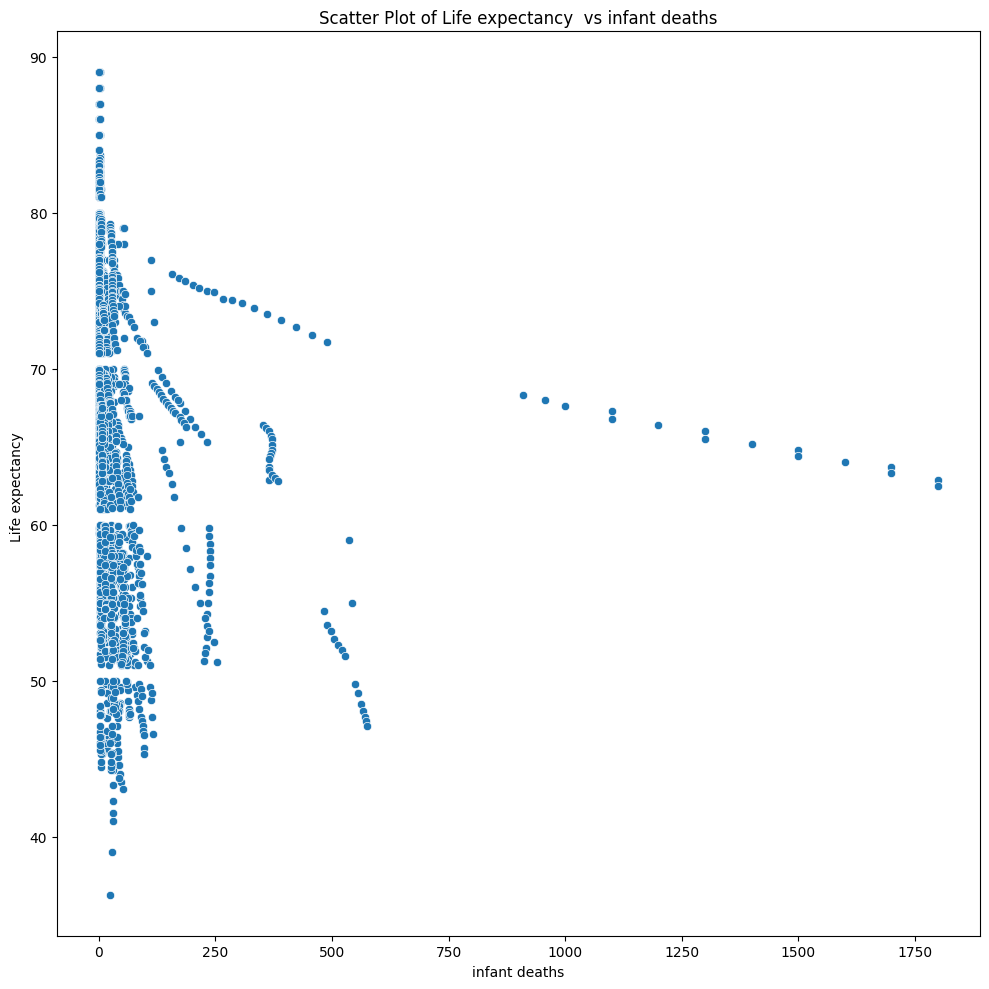

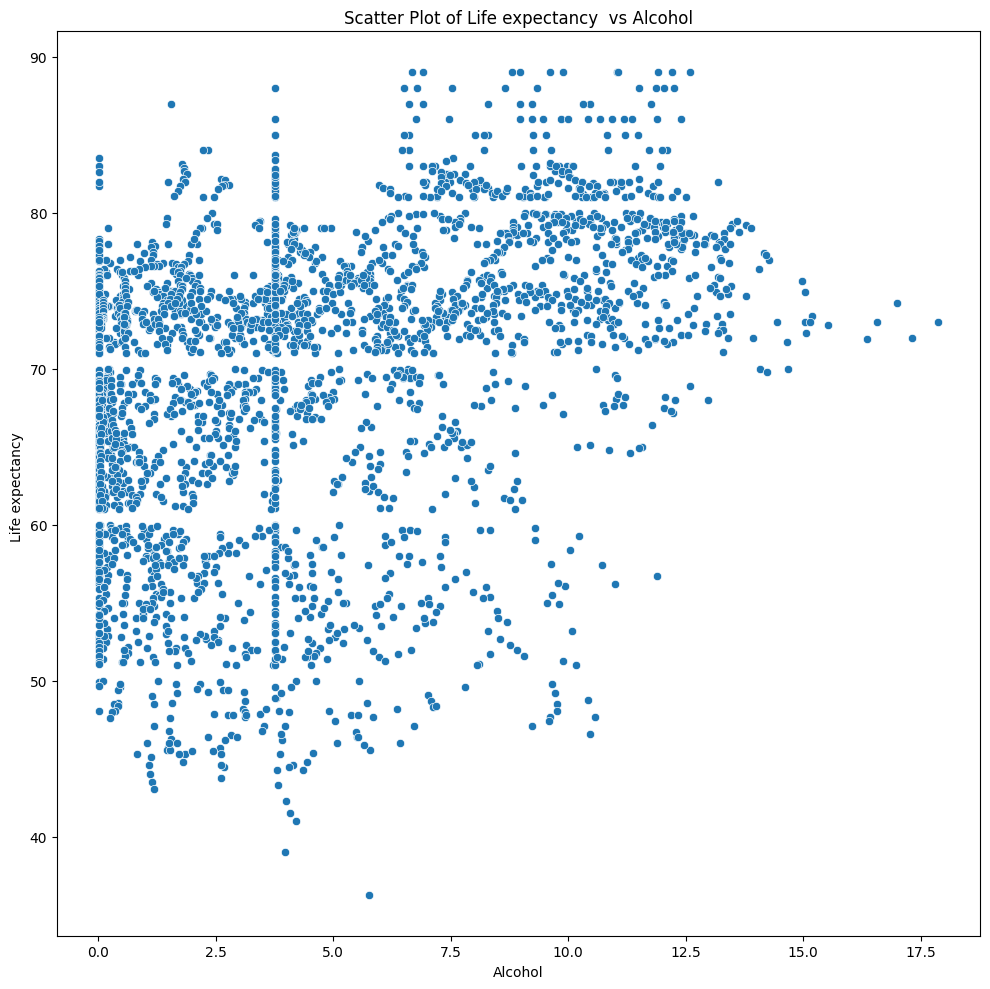

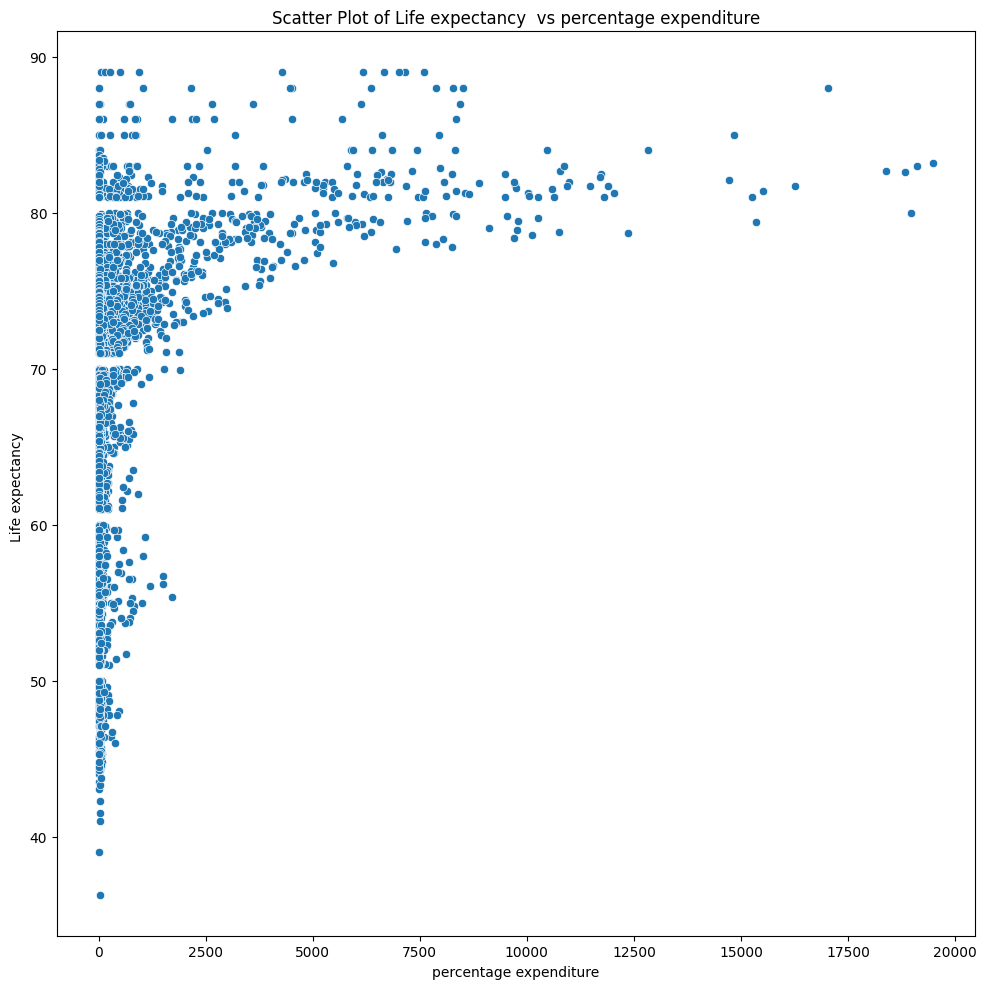

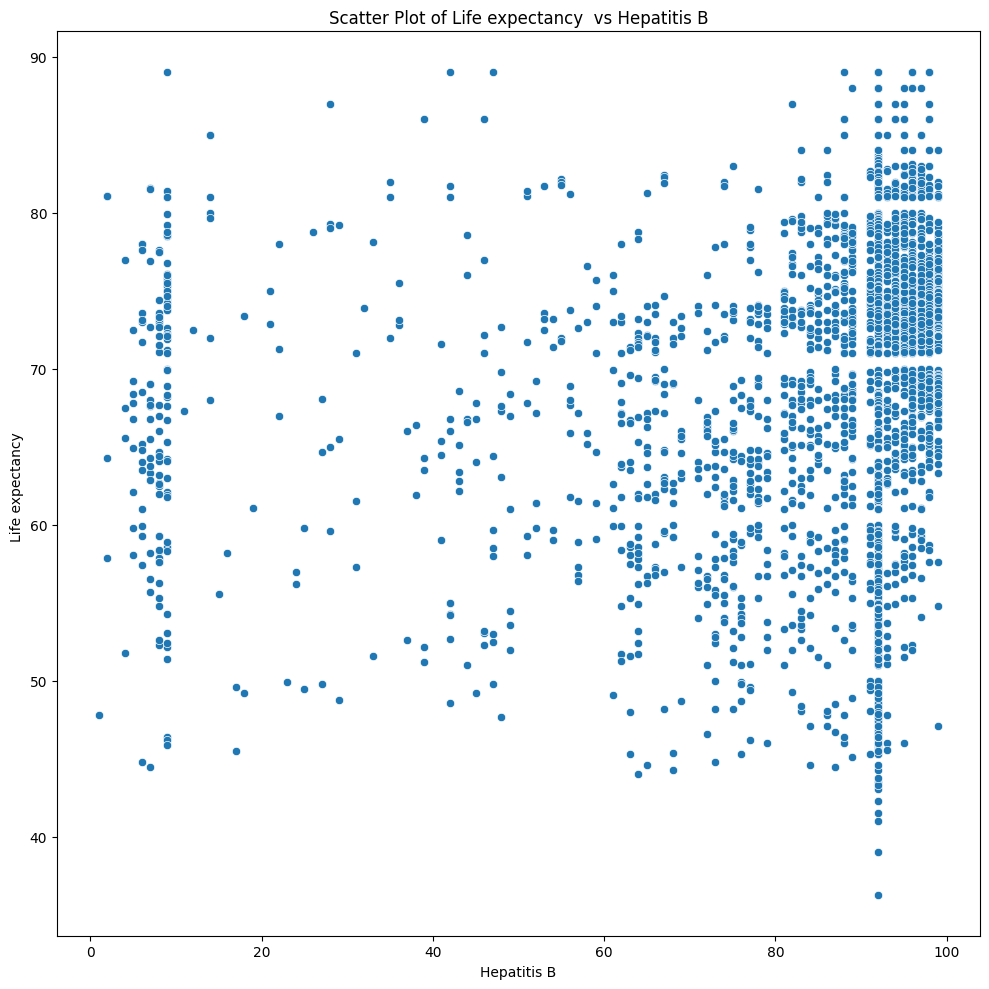

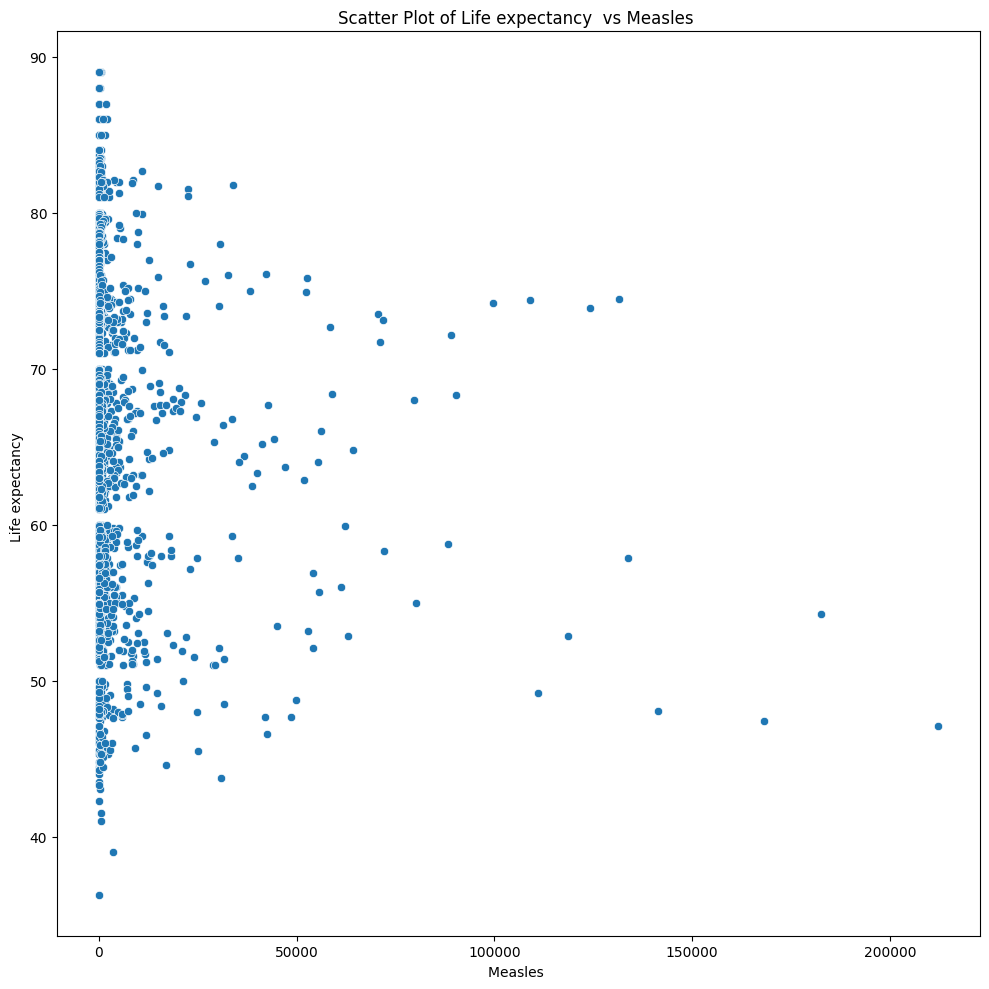

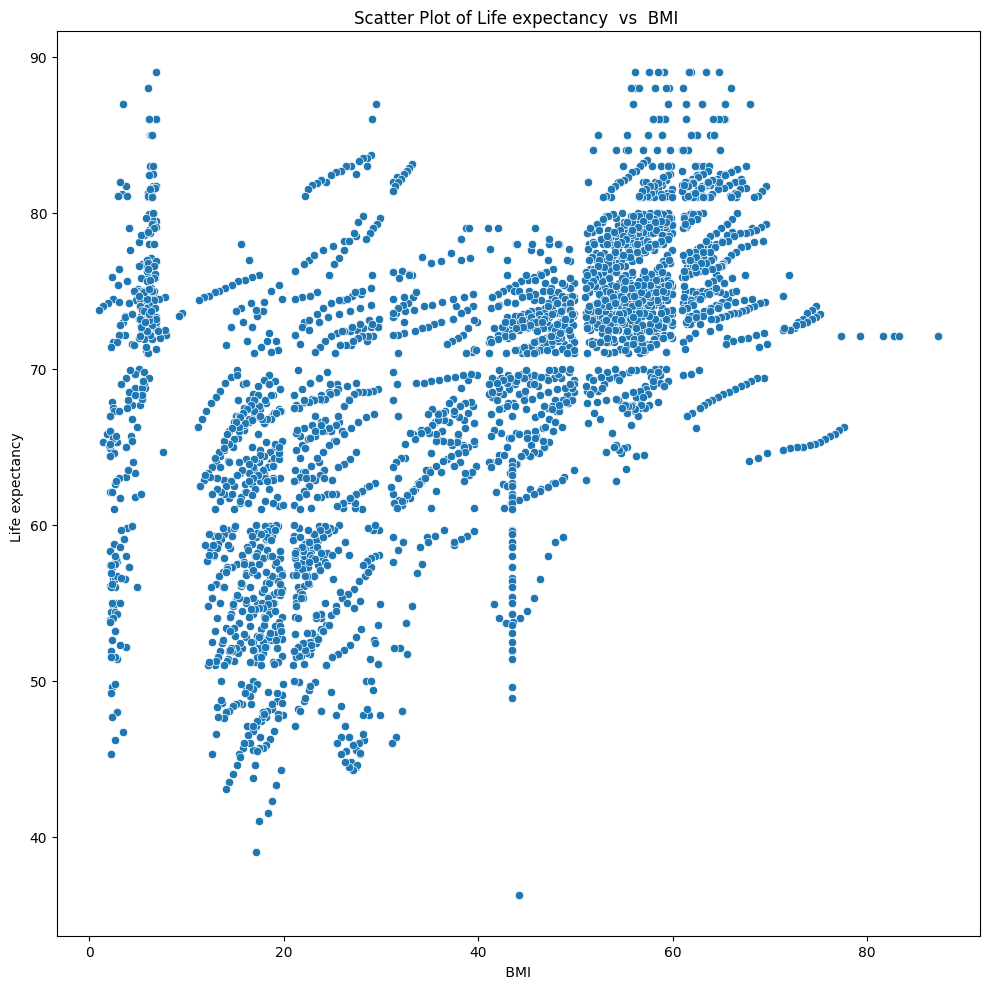

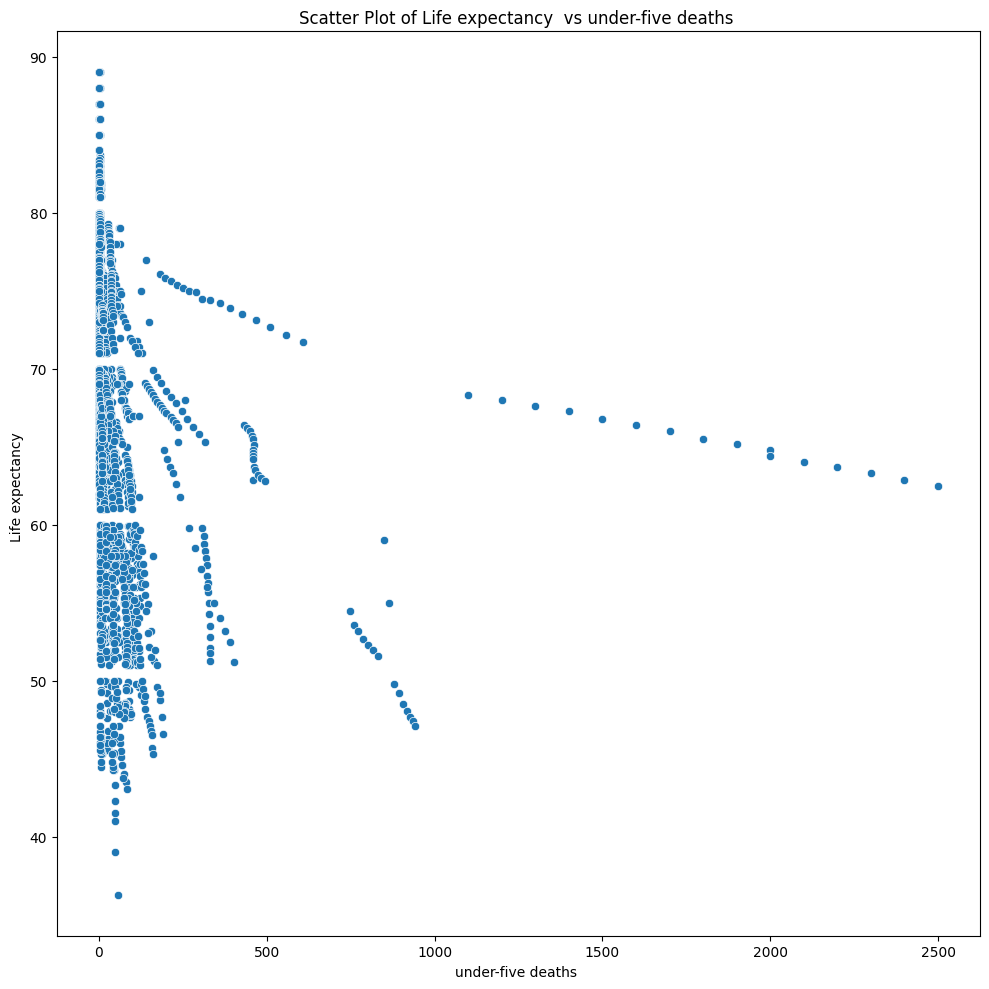

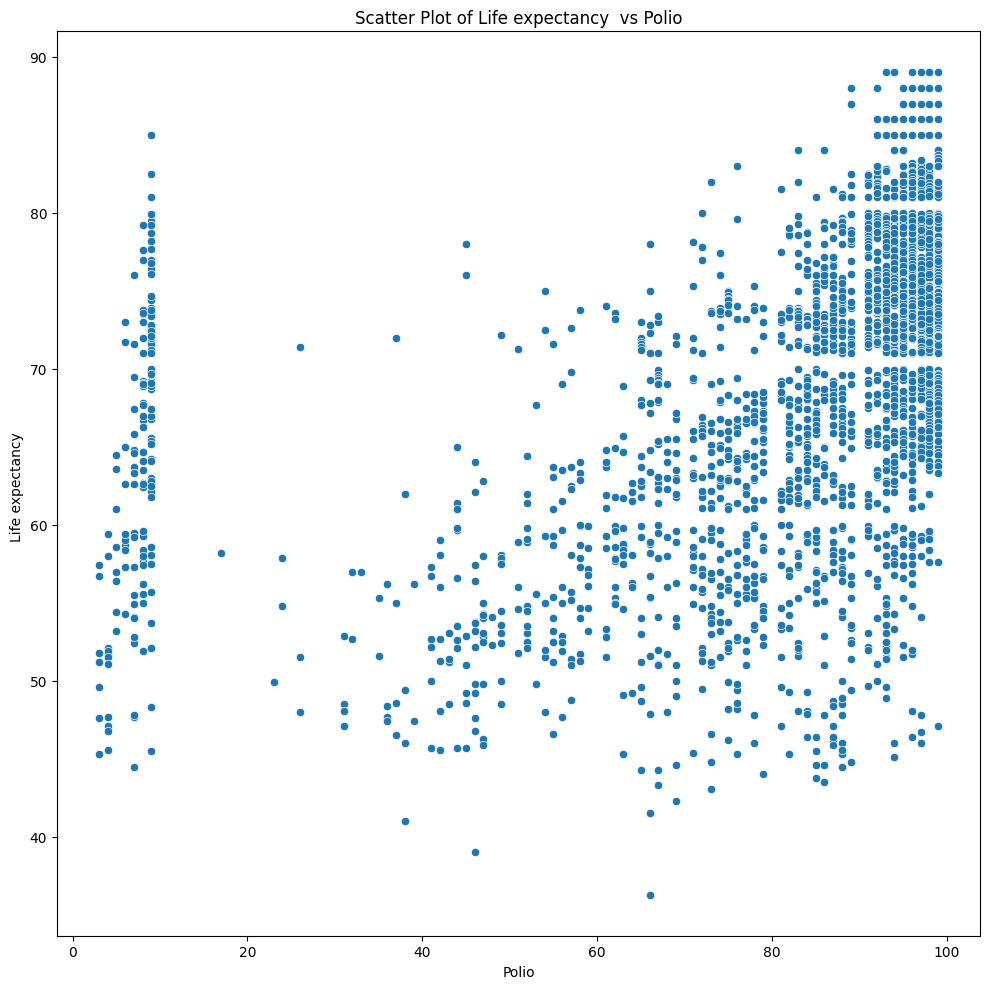

In [59]:
features = ['Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio']
predictor = 'Life expectancy '

def scatter_plot(features, predictor):
    for feature in features:
        plt.figure(figsize=(10, 10))
        sns.scatterplot(x=df[feature], y=df[predictor])
        plt.xlabel(feature)
        plt.ylabel(predictor)
        plt.title(f'Scatter Plot of {predictor} vs {feature}')
        plt.show()

scatter_plot(features, predictor)